## SER-SAG Periodicity Pipeline (LSST in-kind contribution project)

<i> <b> Abstract </i> </b>: Our periodicity-search pipeline includes nonparametric and parametric light curve modelling, based on   different time-domain period-detection algorithms, and a set of techniques for determining the significance level of potential periods. The proposed pipeline combines different time-domain algorithms, including machine learning of light curves, to exploits the information. The pipeline outputs are the extracted light curve periodic features (periodicities, uncertainties, periods probability) which will serve especially the TVS and AGN science collaborations, as well as any other interestred group, for further variability investigations.

<p> 
The software is currently under development, and it will be developed as a  python package available to download and distribute using the PyPi repository. We have made this choice in order to distribute, maintain, and develop software and its versions more easily. Also, the package can be easily installed and executed on the RSP platform.
</p>

<p>
    The package will be separated into a few different modules: </p>
    <ol>
        <li> read module. Read module is primarily used for data acquisition and pre-processing. It will fetch data (either from RSP or user data), and it will check if all necessary pieces of information are given, normalize it and create input objects that will be used as input in our pipeline. For the pipeline to function correctly, initial data must have Object ID, time, flux, flux uncertainty, multi-band LSST Lomb-Scargle periodicity, and it must be supplied by the user (or the connecting system, such as RSP). Read module will have three sub-modules. The first one, named lsst, will be intended for reading and obtaining data from lsst RSP. It will have different functions that will be able to reach lsst data remotely (using API or tas protocol) or directly in RSP. The second one, named user, will have similar functions but for the data supplied by the user. The third one is used for data normalization and basic pre-processing.  </li>
 
<li> Utils module. The purpose of this module is to store any functions that can be used as utilities, e.g., functions to simulate artificial light curves or any other calculation-based functions such as autocorrelation functions, etc. </li>

<li> Plots module. This module's primary purpose is for the graphical representation of data. It has functions to visualize input data, as well as output data. </li>

<li> Output module. This module's purpose is to obtain output data as Python objects. It will have functions that implement our pipeline to obtain periodic features of the LC. Also, it will have the ability to simultaneously execute a vast number of different LC to obtain catalogs with periodicities. To logically organize the module, it will have two sub-modules, one for obtaining periodicity features for a single LC and the other with functions for multiple light curves. </li>
        </ol>





In [7]:
import sys
# Import from local diroctory, the repository will be available on PIP as a final version
sys.path.insert(0, '/home/viktor/Documents/LSST/MAF/inkind/baseperiodicity')
from periodicity import *

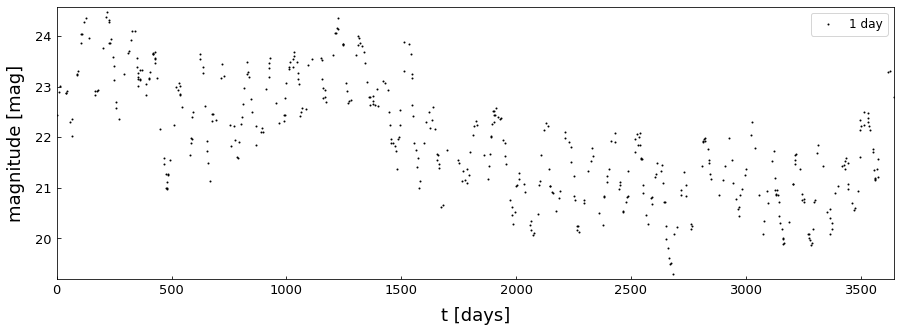

In [9]:
# Creating of a mock signal LC with frequency of 100 days, amplitude of 0.3
# Plot is created using functions in the utils subpackage
period = 100  #days
amplitude = 0.3

# Functions uses time interval in years, number of points, period, ampltude as main arguments
tt, yy = simple_mock_lc(time_interval = 10, num_points = 1000, 
                                    frequency = period, amplitude = amplitude, percent = 0.5, magnitude = 22)
fig_plot(tt, yy)

In [13]:
# In order to perform our analysis we need to apply hybrid2d method 
# Input parametars are time data, magnitude data and parameteres for WWZ transformation, ntau, ngrid - grid size
# As output main products are wwz matrix and autocorrelation matrix of wwz
wwz_matrx, corr, extent = hybrid2d(tt, yy, 80, 800)

*** Starting Weighted Wavelet Z-transform ***

Pseudo sample frequency (median) is  0.203
largest tau window is  46.124
22.88 seconds has passed to complete Weighted Wavelet Z-transform 



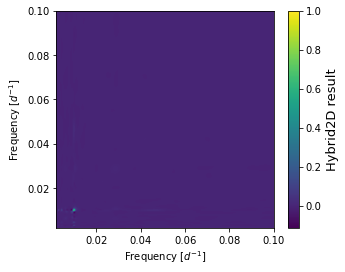

In [14]:
# Plotting wwz matrix heatmap
# Note how er can easly spot detected period
plt_freq_heatmap(corr, extent)

In [5]:
# TODO: zabeleziti i snimiti primer kada je pik "nedovrsen" na samom kraju

r_periods, up, low = periods(corr, sep)
for i in range(len(r_periods)):
    print("Period: %6.3f, upper error : %5.2f  lower error : %5.2f"% (r_periods[i], up[i], low[i]) )

Period: 104.221, upper error : 13.21  lower error : 10.41


In [6]:
# TODO: da moze za sve, da budu sortirani po odabiru po znacajnosti ili po velicini period, 
bins, bins11, sig, siger = signif_johnoson(10, 0 ,corr, tt, yy, 80,sep)

*** Starting Weighted Wavelet Z-transform ***

adjusted time_divisions to:  50
Pseudo sample frequency (median) is  0.02
largest tau window is  72.14
1.78 seconds has passed to complete Weighted Wavelet Z-transform 

*** Starting Weighted Wavelet Z-transform ***

adjusted time_divisions to:  50
Pseudo sample frequency (median) is  0.02
largest tau window is  72.14
2.53 seconds has passed to complete Weighted Wavelet Z-transform 

*** Starting Weighted Wavelet Z-transform ***

adjusted time_divisions to:  50
Pseudo sample frequency (median) is  0.02
largest tau window is  72.14
2.39 seconds has passed to complete Weighted Wavelet Z-transform 

*** Starting Weighted Wavelet Z-transform ***

adjusted time_divisions to:  50
Pseudo sample frequency (median) is  0.02
largest tau window is  72.14
2.41 seconds has passed to complete Weighted Wavelet Z-transform 

*** Starting Weighted Wavelet Z-transform ***

adjusted time_divisions to:  50
Pseudo sample frequency (median) is  0.02
largest tau

In [7]:
print(sig)

1.0


<ipython-input-8-bfb65d8f1a28>:5: RuntimeWarning: Mean of empty slice.
  plt.axvline(bins11.mean(),ymin=bins.min(),ymax=bins.max(), color='k', label ='prob %.3f' % sig )
/home/viktor/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


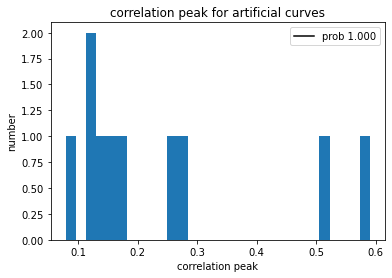

In [8]:
plt.hist(bins,30)
#plt.hist(bins11,50)
bins=np.array(bins)
bins11=np.array(bins11)
plt.axvline(bins11.mean(),ymin=bins.min(),ymax=bins.max(), color='k', label ='prob %.3f' % sig )
plt.xlabel('correlation peak')
plt.ylabel('number')
plt.title('correlation peak for artificial curves')
plt.legend()

In [ ]:
hh1=np.rot90(corr).T/np.rot90(corr).T.max()
hh1arr=np.rot90(hh1.T)
hh1arr1=np.abs(hh1arr).sum(1)/np.abs(hh1arr).sum(1).max()
import photutils
from scipy.signal import find_peaks
fmin =1/500
fmax = 1/10
df = (fmax - fmin) / 800
    
    
import matplotlib.pyplot as plt
    
osax=np.arange(start=fmin,stop=fmax+df,step=fmax)
print(osax)
corr1 = corr
hh1=np.rot90(corr1).T/np.rot90(corr1).T.max()
hh1arr=np.rot90(hh1.T)

hh1arr1=np.abs(hh1arr).sum(1)/np.abs(hh1arr).sum(1).max()
# plt.plot(osax,np.abs(hh1arr1))
print(hh1arr1)

peaks, _ = find_peaks(hh1arr1, 60)

In [ ]:
def get_full_width(x: np.ndarray, y: np.ndarray, peak:np.ndarray,height: float = 0.5) -> float:
    er1=[]
    er3=[]
    from scipy.signal import chirp, find_peaks, peak_widths
    results_half = peak_widths(y, peak)
  
    
    for i in range(len(peak)):
        height_half_max=y[peak[i]]*height
        index_max = peak[i]
        
         
        x_low = np.interp(height_half_max, y[:index_max-int(results_half[i]):index_max],  x[:index_max-int(results_half[i]):index_max])
        x_high = np.interp(height_half_max, np.flip(y[index_max::index_max+int(results_half[i])]), np.flip(x[index_max::index_max+int(results_half[i])]))
        print(x_low)
        print(x_high)
        
        inversefunction = interpolate.interp1d(y[index_max-int(results_half[i]):index_max],  x[index_max-int(results_half[i]):index_max], kind='cubic',fill_value="extrapolate")
        inversefunction2 = interpolate.interp1d(y[index_max:index_max+int(results_half[i])],  x[index_max:index_max+int(results_half[i])], kind='cubic',fill_value="extrapolate")
        arr=y[(x>=x_low)&(x<=x_high)]   
        
        print(arr) 
        


        from scipy.stats.mstats import mquantiles
        q1,q3 = mquantiles(arr, [0.25,0.75])
        print(q1,q3)
        xer1=inversefunction(q1)
        xer3=inversefunction2(q3)
        er1.append(xer1)
        er3.append(xer3)
    return er1,er3


def periods2 (data,ngrid, plot = False, peakHeight = 0.6,  minfq = 500, maxfq = 10): 
    
    hh1=np.rot90(data).T/np.rot90(data).T.max()
    hh1arr=np.rot90(hh1.T)
    hh1arr1=np.abs(hh1arr).sum(1)/np.abs(hh1arr).sum(1).max()
    
    peaks,_ = find_peaks(hh1arr1,peakHeight)
    
    npeak = len(peaks)
    
    fmin =1/minfq
    fmax = 1/maxfq
    df = (fmax - fmin) / ngrid
    
    
    
    osax=np.arange(start=fmin,stop=fmax+df,step=df)
    print("--")
    print(osax)
    print(np.abs(hh1arr1))
    print("--")
#     plt.plot(osax,np.abs(hh1arr1))
    error_upper, error_lower=get_full_width2(osax,hh1arr1,peaks)
    
    r_peaks = []
    r_peaks_err_upper = []
    r_peaks_err_lower = []
    for i in range(npeak):
        r_peaks.append(1/osax[peaks[i]])
        r_peaks_err_upper = np.abs(1/osax[peaks[i]]-(1/error_upper[i]))
        r_peaks_err_lower = np.abs(1/osax[peaks[i]]-( 1/error_lower[i]))
        
    return r_peaks_err_upper, r_peaks_err_lower
        

In [ ]:
osax=np.arange(start=fmin,stop=fmax+df,step=df)
hh1=np.rot90(corr).T/np.rot90(corr).T.max()
hh1arr=np.rot90(hh1.T)
hh1arr1=np.abs(hh1arr).sum(1)/np.abs(hh1arr).sum(1).max()

In [ ]:
osax=np.arange(start=fmin,stop=fmax+df,step=df)
hh1=np.rot90(corr).T/np.rot90(corr).T.max()
hh1arr=np.rot90(hh1.T)
hh1arr1=np.abs(hh1arr).sum(1)/np.abs(hh1arr).sum(1).max()

plt.plot(osax,np.abs(hh1arr1))
peaks,_ = find_peaks(hh1arr1,0.58)
print(peaks)
periods2(corr, 800)

In [ ]:
error_upper, error_lower

In [3]:



df = pd.read_csv('raw_data_2.csv')

        
df



FileNotFoundError: [Errno 2] No such file or directory: 'raw_data_2.csv'